In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.nn import CrossEntropyLoss
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [2]:
input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])

# Implement a small neural network for binary classification
model = nn.Sequential(
  nn.Linear(8, 1),
  nn.Sigmoid()
)

output = model(input_tensor)
print(output)

tensor([[0.2949]], grad_fn=<SigmoidBackward0>)


In [3]:
input_tensor = torch.Tensor([[3, 4, 6, 7, 10, 12, 2, 3, 6, 8, 9]])

# Update network below to perform a multi-class classification with four labels
model = nn.Sequential(
  nn.Linear(11, 20),
  nn.Linear(20, 12),
  nn.Linear(12, 6),
  nn.Linear(6, 4), 
  nn.Softmax(dim=-1)
)

output = model(input_tensor)
print(output)

tensor([[0.0786, 0.0892, 0.7270, 0.1052]], grad_fn=<SoftmaxBackward0>)


In [8]:
y = 1
num_classes = 3

# Create the one-hot encoded vector using NumPy
one_hot_numpy = np.array([0, 1, 0])
print(one_hot_numpy)

# Create the one-hot encoded vector using PyTorch
one_hot_pytorch = F.one_hot(torch.tensor(y), num_classes=3)
print(one_hot_pytorch)

[0 1 0]
tensor([0, 1, 0])


In [10]:
y = [2]
scores = torch.tensor([[0.1, 6.0, -2.0, 3.2]])

# Create a one-hot encoded vector of the label y
one_hot_label = F.one_hot(torch.tensor(y), scores.shape[1])

# Create the cross entropy loss function
criterion = CrossEntropyLoss()

# Calculate the cross entropy loss
loss = criterion(scores.double(), one_hot_label.double())
print(loss)

tensor(8.0619, dtype=torch.float64)


In [11]:
model = nn.Sequential(nn.Linear(16, 8),
                      nn.Linear(8, 2)
                     )

# Access the weight of the first linear layer
weight_0 = model[0].weight
print(weight_0)

# Access the bias of the second linear layer
bias_1 = model[1].bias
print(bias_1)

Parameter containing:
tensor([[ 0.0024, -0.0678, -0.2169,  0.1607,  0.0504,  0.0379, -0.1461,  0.0081,
         -0.2060, -0.0472, -0.0003,  0.0440,  0.1925,  0.2046,  0.1847,  0.1424],
        [ 0.0705,  0.1877, -0.1419, -0.1736,  0.2498,  0.1226, -0.1962,  0.0929,
         -0.0346, -0.0576, -0.1628, -0.1369,  0.2022,  0.1927,  0.1896,  0.1245],
        [ 0.1999, -0.2423, -0.0089, -0.0248, -0.2284,  0.2360,  0.0323, -0.0594,
         -0.1892,  0.0297,  0.1970,  0.0228, -0.2337, -0.1264, -0.1885,  0.1599],
        [-0.1014,  0.1895,  0.1721,  0.0664,  0.0844,  0.1454,  0.2420,  0.2079,
         -0.1024,  0.1719,  0.1515,  0.0819,  0.0881,  0.1276, -0.1353,  0.1658],
        [-0.1354,  0.1907, -0.1282,  0.0928, -0.1099, -0.1215, -0.0996,  0.0679,
          0.0306,  0.1137,  0.1295, -0.1917,  0.2322, -0.2122,  0.1796, -0.1119],
        [-0.1235, -0.0521,  0.1569, -0.0661, -0.0786, -0.0601,  0.1716,  0.0991,
          0.1655, -0.2162,  0.1334, -0.1766,  0.1167, -0.1453,  0.2139,  0.0275],


In [22]:
sample = torch.randn(1, 16)
model = nn.Sequential(nn.Linear(16, 8),
                        nn.Linear(8, 4), 
                        nn.Linear(4, 2),
                        nn.Softmax(dim=1))
prediction = model(sample)

In [16]:
target = torch.tensor([1])

In [17]:
criterion = CrossEntropyLoss() 
loss = criterion(prediction, target) 
loss.backward()

In [19]:
lr = 0.001
weight0 = model[0].weight
weight1 = model[1].weight
weight2 = model[2].weight

# Access the gradients of the weight of each linear layer
grads0 = weight0.grad
grads1 = weight1.grad
grads2 = weight2.grad
print(grads0)

# Update the weights using the learning rate and the gradients
weight0 = weight0 - lr*grads0
weight1 = weight1 - lr*grads1
weight2 = weight2 - lr*grads2

tensor([[-0.0358, -0.0371, -0.0369, -0.0166,  0.0039, -0.0603, -0.0160, -0.0459,
          0.0452, -0.0155,  0.0487,  0.0454,  0.0495, -0.0401,  0.0424,  0.0493],
        [ 0.0385,  0.0399,  0.0397,  0.0179, -0.0042,  0.0650,  0.0172,  0.0494,
         -0.0486,  0.0167, -0.0525, -0.0489, -0.0533,  0.0432, -0.0457, -0.0531],
        [-0.0045, -0.0047, -0.0047, -0.0021,  0.0005, -0.0077, -0.0020, -0.0058,
          0.0057, -0.0020,  0.0062,  0.0058,  0.0063, -0.0051,  0.0054,  0.0063],
        [-0.0441, -0.0457, -0.0455, -0.0205,  0.0048, -0.0744, -0.0197, -0.0566,
          0.0557, -0.0192,  0.0601,  0.0560,  0.0611, -0.0495,  0.0523,  0.0608],
        [-0.0179, -0.0185, -0.0184, -0.0083,  0.0020, -0.0302, -0.0080, -0.0230,
          0.0226, -0.0078,  0.0244,  0.0227,  0.0248, -0.0201,  0.0212,  0.0246],
        [ 0.0409,  0.0424,  0.0421,  0.0190, -0.0045,  0.0690,  0.0182,  0.0525,
         -0.0516,  0.0178, -0.0557, -0.0519, -0.0566,  0.0458, -0.0485, -0.0563],
        [ 0.0065,  0.0

In [23]:
# Create the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

loss = criterion(prediction, target)
loss.backward()

# Update the model's parameters using the optimizer
optimizer.step()

In [25]:
y_pred = np.array(10)
y = np.array(4)

# Calculate the MSELoss using NumPy
mse_numpy = (y - y_pred)**2

# Create the MSELoss function
criterion = nn.MSELoss()

# Calculate the MSELoss using the created loss function
mse_pytorch = criterion(torch.tensor(y_pred, dtype=torch.float32), torch.tensor(y, dtype=torch.float32))
print(mse_pytorch)

tensor(36.)


In [28]:
# Função para mostrar as predições vs valores reais
def show_results(model, dataloader):
    model.eval()  # Muda para modo de avaliação
    with torch.no_grad():
        for i, (feature, target) in enumerate(dataloader):
            if i == 0:  # Mostra apenas o primeiro batch
                prediction = model(feature)
                print("\nPredições vs Valores reais:")
                for j in range(len(prediction)):
                    print(f"Predito: {prediction[j].item():.4f}, Real: {target[j].item():.4f}")
                break

In [33]:
# Configurações iniciais
num_epochs = 50
batch_size = 16
learning_rate = 0.01

# Gerando um dataset sintético para regressão
torch.manual_seed(42)
num_samples = 100

# Cria features de 16 dimensões representando, por exemplo, 16 medições normalizadas
features = torch.linspace(0, 1, steps=num_samples*16).view(num_samples, 16)

# Cria targets contínuos que fazem sentido: a soma das 16 medições com um ruído pequeno
targets = features.sum(dim=1, keepdim=True) + 0.1 * torch.randn(num_samples, 1)


# Criação do dataset e do dataloader
dataset = TensorDataset(features, targets)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Definição do modelo para regressão
model = nn.Sequential(
    nn.Linear(16, 8),
    nn.Linear(8, 4), 
    nn.Linear(4, 1)  # Saída com 1 neurônio para prever um valor contínuo
)

# Função de custo MSE para regressão e otimizador Adam
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [34]:
# Armazenando a perda para plotagem
loss_history = []

# Loop de treinamento
for epoch in range(num_epochs):
    epoch_loss = 0
    for data in dataloader:
        # Zerando os gradientes
        optimizer.zero_grad()
        
        # Forward pass: obtém as features e targets
        feature, target = data
        prediction = model(feature)
        
        # Calcula a perda
        loss = criterion(prediction, target)
        epoch_loss += loss.item()
        
        # Backpropagation e atualização dos pesos
        loss.backward()
        optimizer.step()
    
    loss_history.append(epoch_loss / len(dataloader))
    print(f"Época {epoch+1}/{num_epochs}, Loss: {loss_history[-1]:.4f}")

Época 1/50, Loss: 86.4607
Época 2/50, Loss: 65.8385
Época 3/50, Loss: 39.8812
Época 4/50, Loss: 5.9245
Época 5/50, Loss: 5.8172
Época 6/50, Loss: 1.7959
Época 7/50, Loss: 1.1708
Época 8/50, Loss: 0.9283
Época 9/50, Loss: 0.2892
Época 10/50, Loss: 0.3697
Época 11/50, Loss: 0.2053
Época 12/50, Loss: 0.1782
Época 13/50, Loss: 0.1461
Época 14/50, Loss: 0.1490
Época 15/50, Loss: 0.1088
Época 16/50, Loss: 0.0966
Época 17/50, Loss: 0.1002
Época 18/50, Loss: 0.0912
Época 19/50, Loss: 0.0771
Época 20/50, Loss: 0.0649
Época 21/50, Loss: 0.0556
Época 22/50, Loss: 0.0560
Época 23/50, Loss: 0.0524
Época 24/50, Loss: 0.0369
Época 25/50, Loss: 0.0348
Época 26/50, Loss: 0.0301
Época 27/50, Loss: 0.0286
Época 28/50, Loss: 0.0273
Época 29/50, Loss: 0.0225
Época 30/50, Loss: 0.0211
Época 31/50, Loss: 0.0182
Época 32/50, Loss: 0.0182
Época 33/50, Loss: 0.0157
Época 34/50, Loss: 0.0183
Época 35/50, Loss: 0.0143
Época 36/50, Loss: 0.0140
Época 37/50, Loss: 0.0128
Época 38/50, Loss: 0.0120
Época 39/50, Loss:

In [35]:
# Exibindo os resultados
show_results(model, dataloader)


Predições vs Valores reais:
Predito: 4.0999, Real: 4.2072
Predito: 4.4193, Real: 4.5312
Predito: 12.7231, Real: 12.6479
Predito: 10.1681, Real: 10.2997
Predito: 12.8827, Real: 12.8841
Predito: 9.3696, Real: 9.3545
Predito: 11.9246, Real: 11.9281
Predito: 0.5868, Real: 0.3448
Predito: 7.4534, Real: 7.3162
Predito: 1.0658, Real: 1.0313
Predito: 13.0424, Real: 13.0093
Predito: 15.2781, Real: 15.2542
Predito: 13.6812, Real: 13.7419
Predito: 10.6471, Real: 10.8635
Predito: 11.7649, Real: 11.8147
Predito: 0.1077, Real: 0.2677


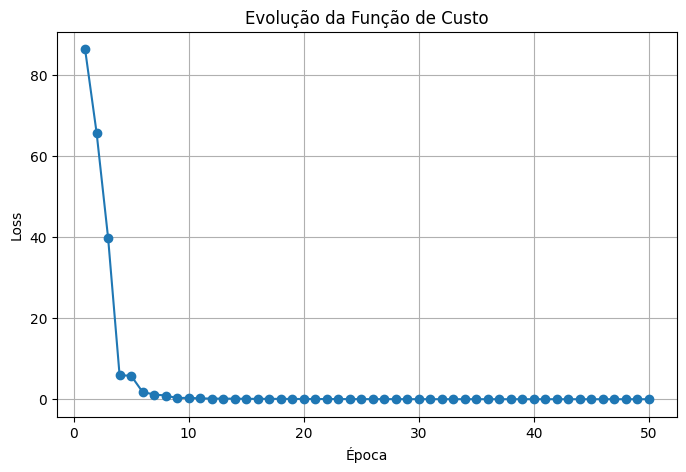

In [36]:
# Plotando a evolução da função de custo (loss)
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), loss_history, marker='o', linestyle='-')
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Evolução da Função de Custo")
plt.grid()
plt.show()